<a href="https://colab.research.google.com/github/Tanmoy-94/Noise_Risk_Modelling_.ipynb/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


2025-03-17 17:59:51.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.034 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-17 17:59:52.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:59:52.052 Thread 'MainThread': mi

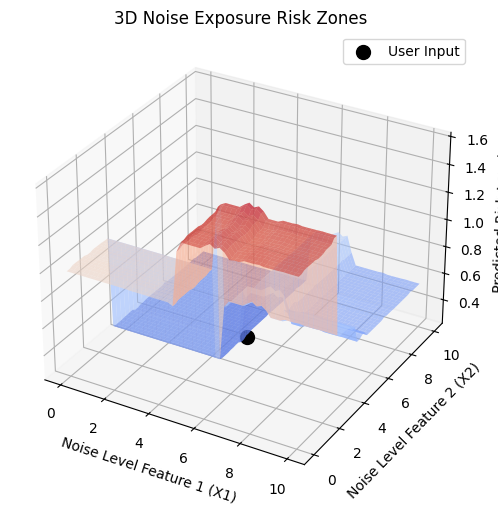

In [1]:
!pip install streamlit
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load or generate sample data (replace with real data)
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two noise-related features
y = 0.32 + 0.45 * (X[:, 0] > 5) + 0.68 * (X[:, 1] < 3) - 0.22 * ((X[:, 0] > 7) & (X[:, 1] > 4))

# Train the model
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1, random_state=42)
gb_model.fit(X, y)

# Streamlit UI
st.title("Noise Risk Prediction App")
st.write("Predict risk levels based on noise exposure features.")

# User inputs for noise features
X1 = st.slider("Noise Level Feature 1 (X1)", 0.0, 10.0, 5.0)
X2 = st.slider("Noise Level Feature 2 (X2)", 0.0, 10.0, 5.0)

# Make prediction
X_input = np.array([[X1, X2]])
predicted_risk = gb_model.predict(X_input)[0]

st.subheader("Predicted Risk Level:")
st.write(f"{predicted_risk:.2f}")

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X_range = np.linspace(0, 10, 50)
Y_range = np.linspace(0, 10, 50)
X_grid, Y_grid = np.meshgrid(X_range, Y_range)
Z_grid = gb_model.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)

ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='coolwarm', alpha=0.6)
ax.scatter(X1, X2, predicted_risk, color='black', s=100, label='User Input')
ax.set_xlabel("Noise Level Feature 1 (X1)")
ax.set_ylabel("Noise Level Feature 2 (X2)")
ax.set_zlabel("Predicted Risk Level")
ax.set_title("3D Noise Exposure Risk Zones")
ax.legend()

st.pyplot(fig)

# Model Performance
y_pred = gb_model.predict(X)
r2 = r2_score(y, y_pred)
st.write(f"Model R² Score: {r2:.4f}")
